# Constants

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young's modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

# Class Project Version - Backslash 

In [3]:
n = 1000; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N); % generating a sparse matrix

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = 0;
f(N) = f(N)/2;
format short e

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Left end
A(1,1) = 1;
A(2,2) = 7;
A(1,2) = 0;
A(1,3) = 0;
A(2,1) = 0;
A(3,1) = 0;
A(2,3) = -4;
A(2,4) = 1;

% Right end
A(N,N) = 1;
A(N-1,N-1) =  5;
A(N-1,N) = -2;
A(N-2,N) = 1;
A(N, N-1) = -2;
A(N, N-2) = 1;
A(N-1,N-2) = -4;
A(N-1,N-3) = 1;

% Solve for y
y = A\f;

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =    5.0911e-06


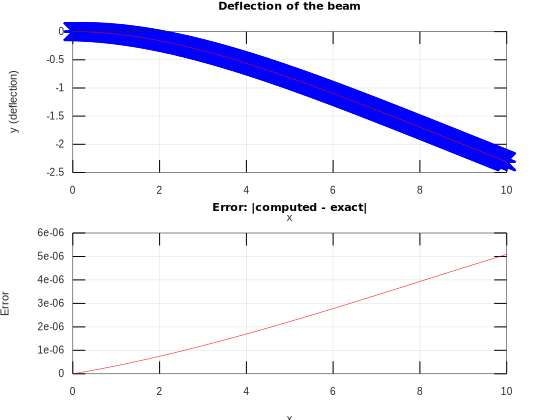

In [4]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# Class Project Version - Penta

In [8]:
n = 10; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = 0;
f(N) = f(N)/2;

% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Free right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = -2.0;
dp2(N-2) = 1.0;
dm1(N-1) = -2.0;
dm2(N-2) = 1.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =  0.0231025500003823


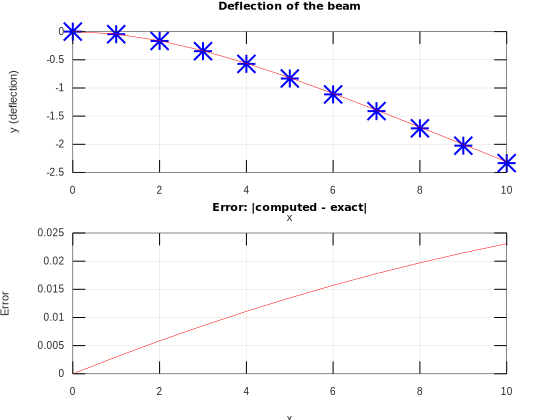

In [9]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# Sauer First Edition - Backslash

In [7]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
format long


n = 10; % number of subintervals on [h, L]
A = sparse(n,n);
%A = [];
h = L/(n+1); % discretization spacing
N = n+1; % number of unknowns to be solved for 

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;

% left end point
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);

% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 1
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 1
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 1
            A(i,j) = 1;
        endif
    endfor
endfor

% right endpoint
A(N,N) = (12/25);
A(N-1,N) = (-43/25);
A(N,N-1) = (-24/25);
A(N-1,N-1) = (111/25);
A(N,N-2) = (12/25);
A(N-1,N-2) = (-93/25);

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =  0.598247851239471


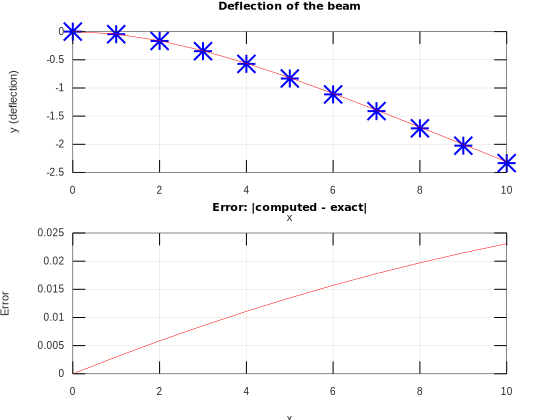

In [10]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# Sauer First Edition - Penta

# Sauer Second Edition  - Backslash

In [11]:
tic;
format rat
n = 10; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 16;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = (-1/4);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-3) = -(12/17);
A(N,N-2) = (96/17);
A(N,N-1) = -(156/17);
A(N,N) = (72/17);
A(N-1,N) = -(28/17);
A(N-1,N-1) = (72/17);
A(N-1,N-2) = -(60/17);
A(N-1,N-3) = (16/17);
% Finding y
y = A\f;
A
% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))
toc

error: operator \: nonconformant arguments (op1 is 11x11, op2 is 10x1)
A =

Compressed Column Sparse (rows = 11, cols = 11, nnz = 51 [42%])

  (1, 1) -> 16
  (2, 1) -> -4
  (3, 1) -> 1
  (1, 2) -> -9
  (2, 2) -> 6
  (3, 2) -> -4
  (4, 2) -> 1
  (1, 3) -> 8/3
  (2, 3) -> -4
  (3, 3) -> 6
  (4, 3) -> -4
  (5, 3) -> 1
  (1, 4) -> -1/4
  (2, 4) -> 1
  (3, 4) -> -4
  (4, 4) -> 6
  (5, 4) -> -4
  (6, 4) -> 1
  (3, 5) -> 1
  (4, 5) -> -4
  (5, 5) -> 6
  (6, 5) -> -4
  (7, 5) -> 1
  (4, 6) -> 1
  (5, 6) -> -4
  (6, 6) -> 6
  (7, 6) -> -4
  (8, 6) -> 1
  (5, 7) -> 1
  (6, 7) -> -4
  (7, 7) -> 6
  (8, 7) -> -4
  (9, 7) -> 16/17
  (10, 7) -> -12/17
  (6, 8) -> 1
  (7, 8) -> -4
  (8, 8) -> 6
  (9, 8) -> -60/17
  (10, 8) -> 96/17
  (7, 9) -> 1
  (8, 9) -> -4
  (9, 9) -> 72/17
  (10, 9) -> -156/17
  (11, 9) -> 12/25
  (8, 10) -> 1
  (9, 10) -> -28/17
  (10, 10) -> 72/17
  (11, 10) -> -24/25
  (9, 11) -> 1
  (10, 11) -> -43/25
  (11, 11) -> 12/25

error: operator -: nonconformant arguments (op1 is 11

error: horzcat: cat: dimension mismatch
error: operator -: nonconformant arguments (op1 is 11x1, op2 is 10x1)


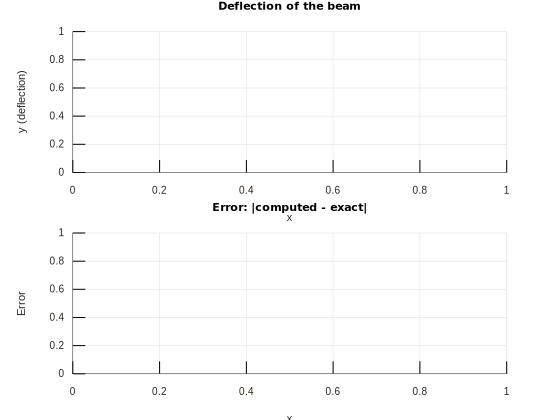

In [12]:
subplot(2,1,1);
plot(horzcat(0,x), horzcat(0,y), "b*", horzcat(0,x), horzcat(0,y_exact), "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;